In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from matplotlib.colors import ListedColormap

In [2]:
#Загрузим датасет
df = pd.read_csv('world_happiness_report_2019.csv')
df.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [3]:
#Проведём первичный анализ данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [4]:

df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [5]:
df.describe(include='object')

,Country or region
count,156
unique,156
top,Finland
freq,1


In [6]:
duplicates = df[df.duplicated(keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Overall rank, Country or region, Score, GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, Perceptions of corruption]
Index: []


In [7]:
df.duplicated().sum()

0

Видно, что в датасете нет пропущенных значений, дубликатов, и можно дальше анализировать различные статистические показатели и взаимосвязи между ними.
Проведём визуализацию данных на различных графиках.

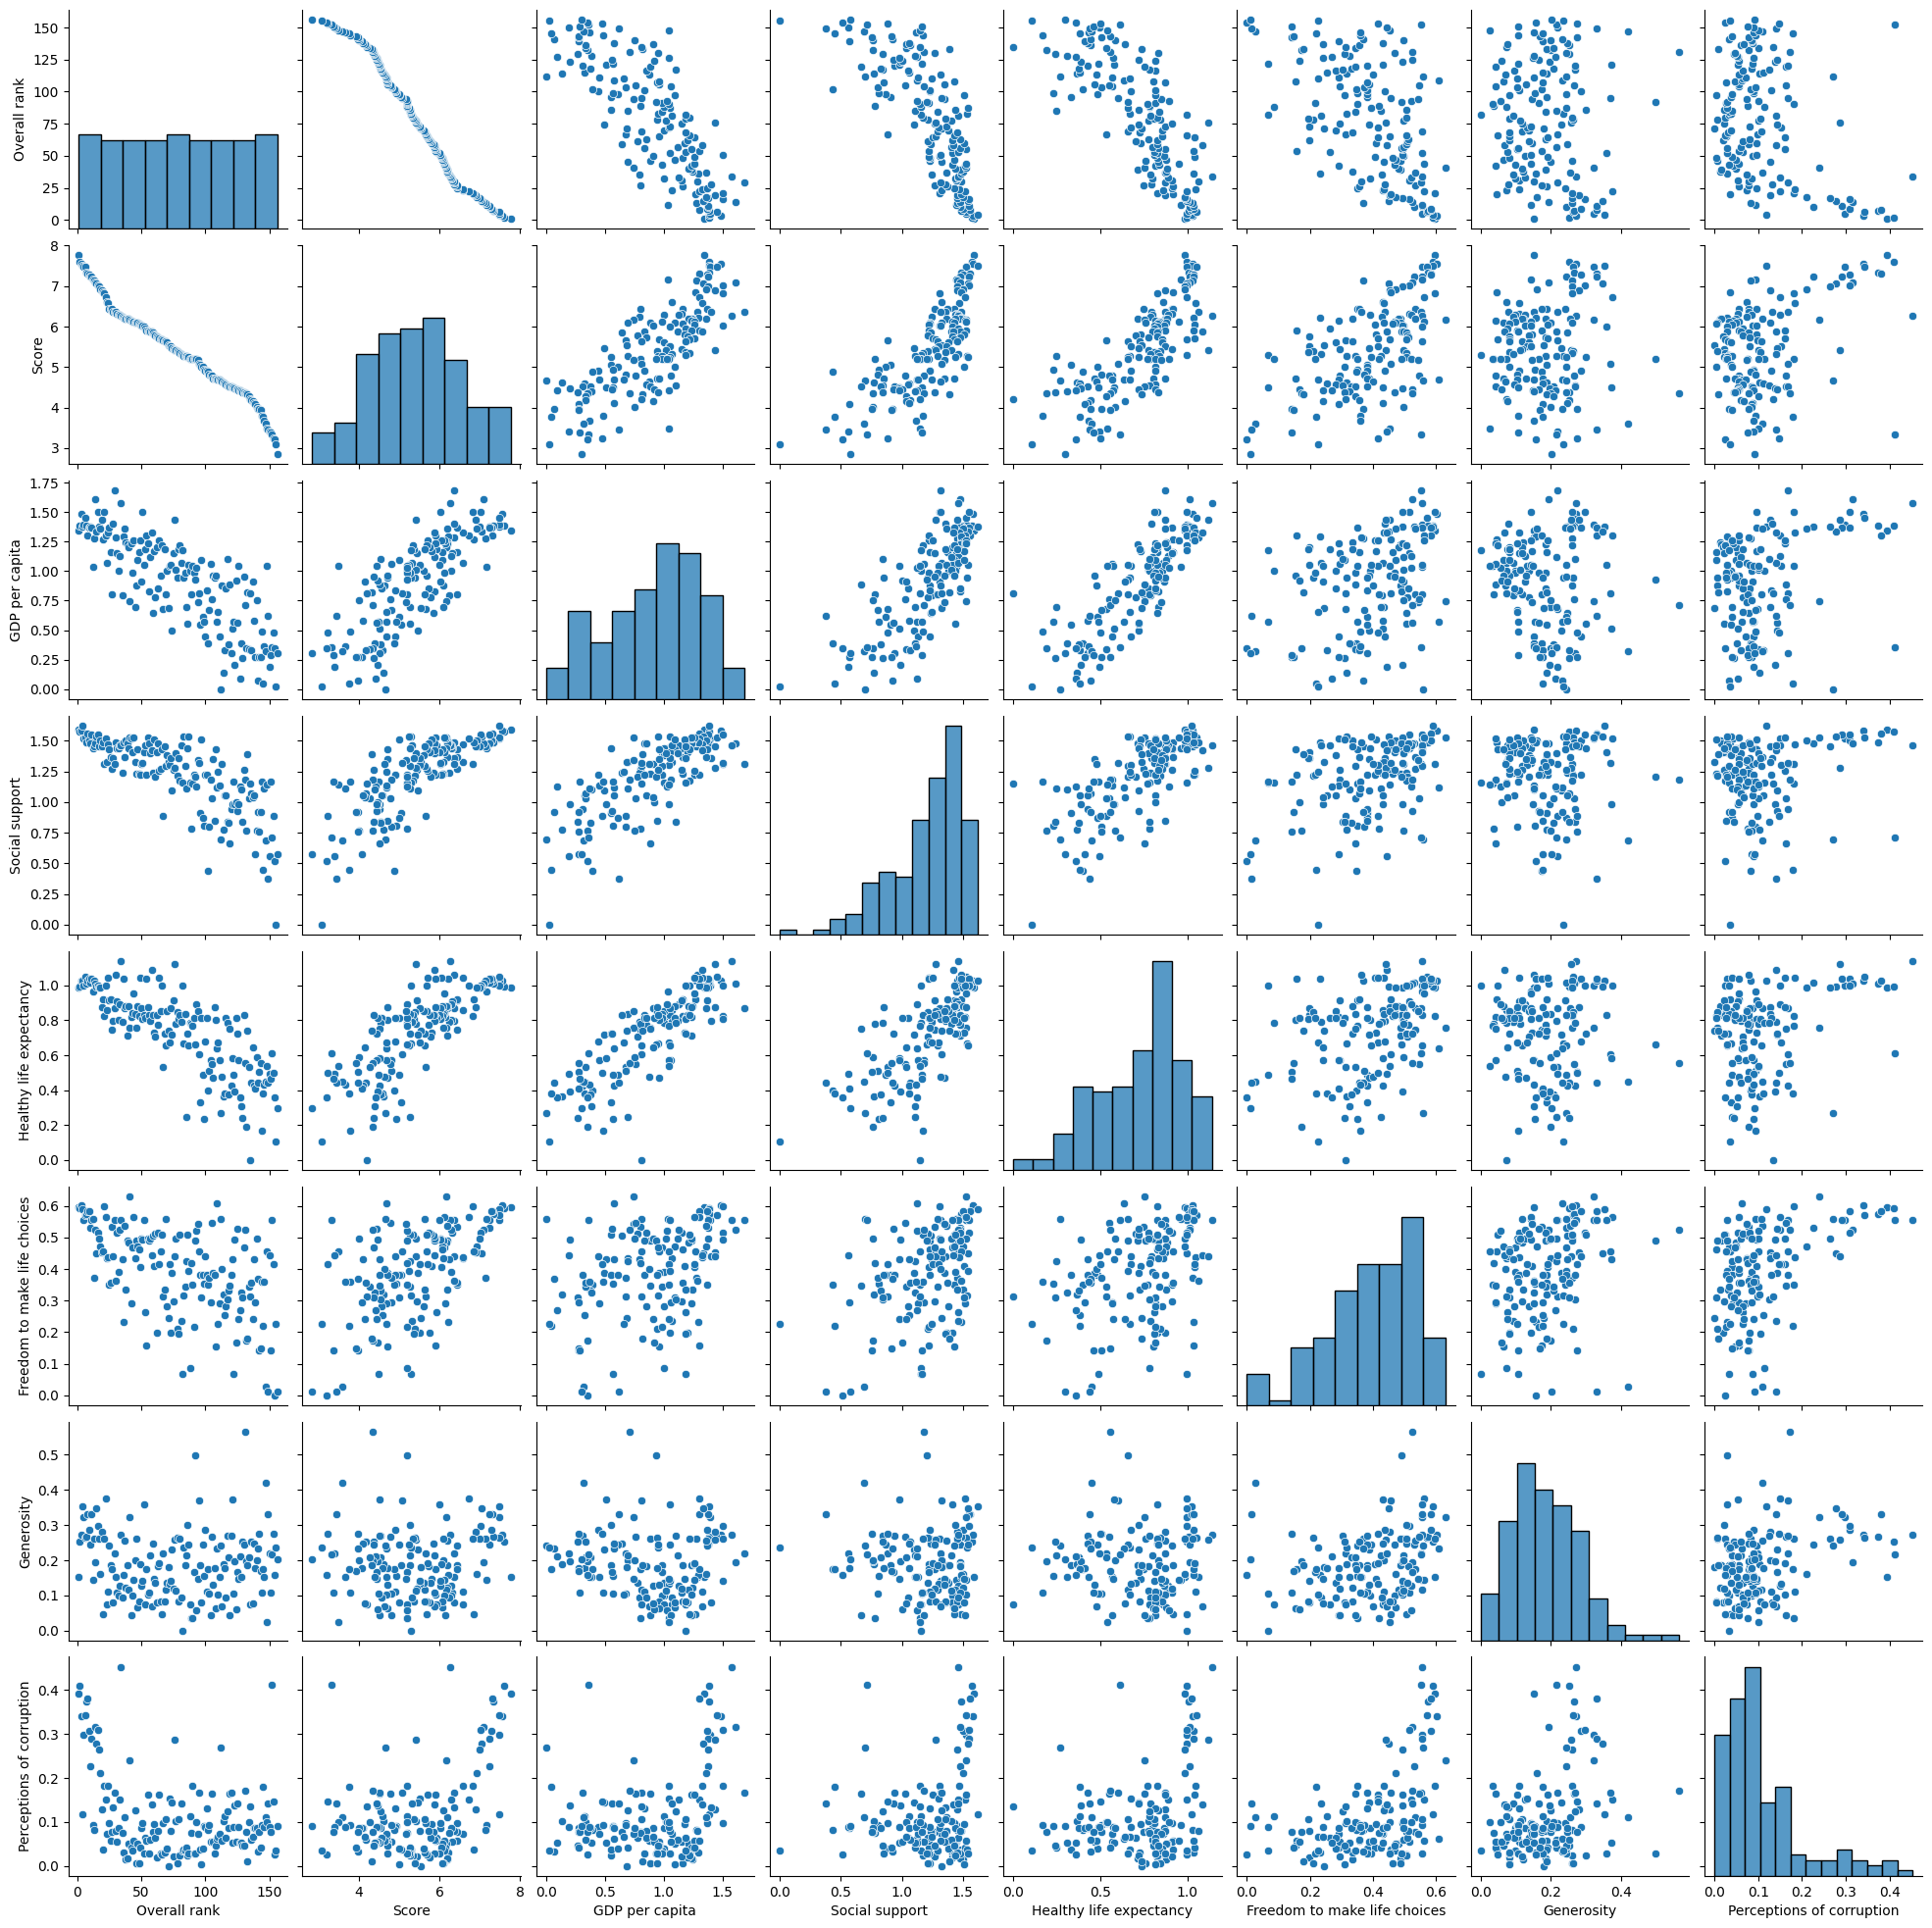

In [8]:
sns.pairplot(df);

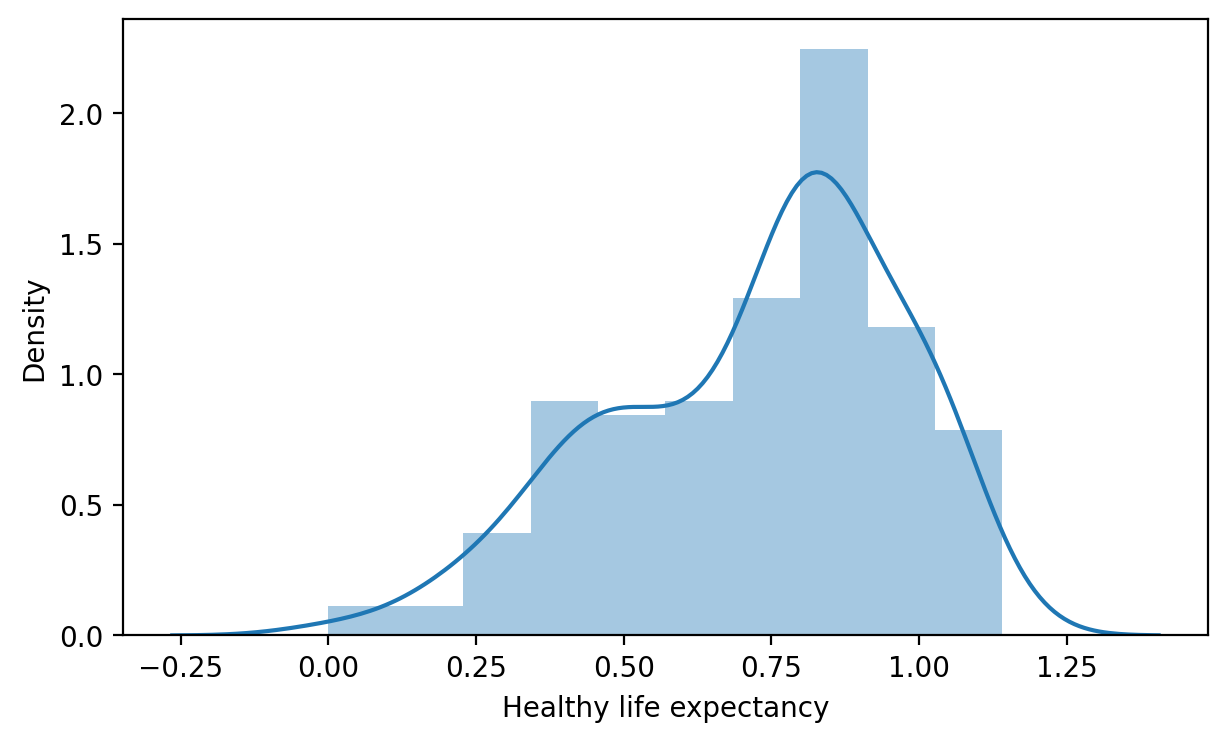

In [9]:
plt.figure(figsize=(7, 4), dpi=200)
sns.distplot(df['Healthy life expectancy'], kde = True);

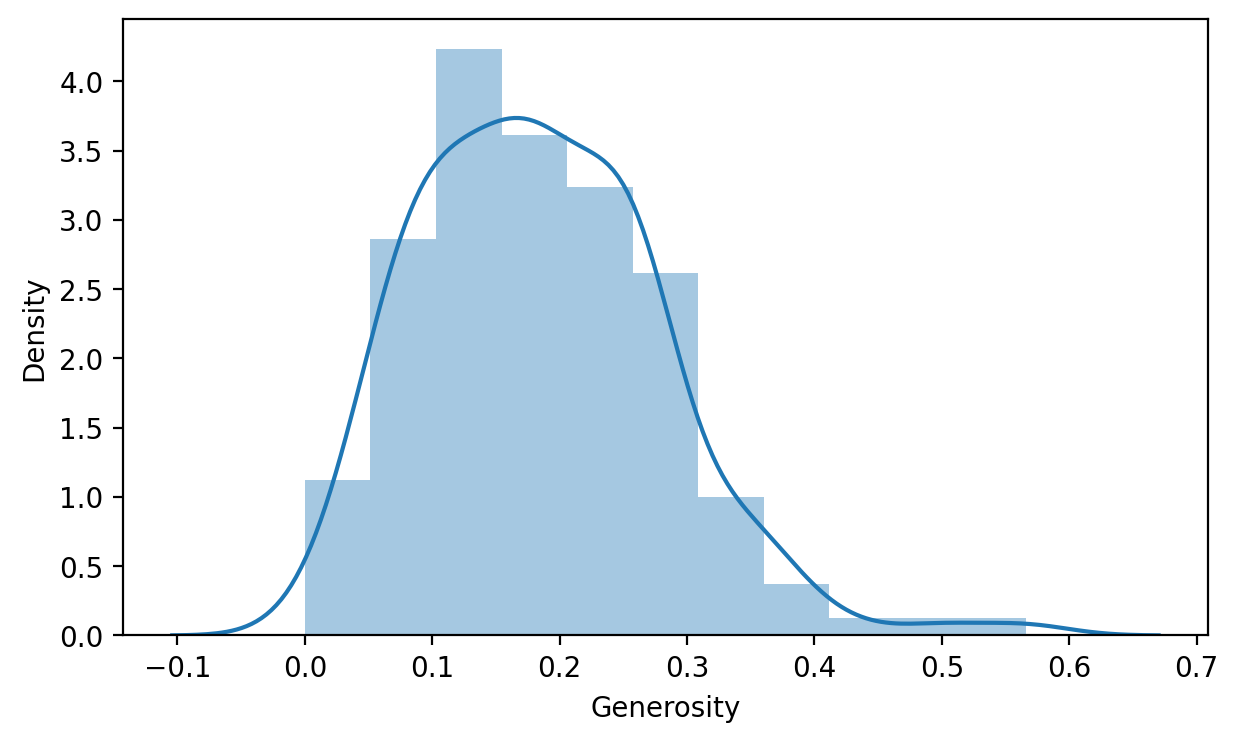

In [10]:
plt.figure(figsize=(7, 4), dpi=200)
sns.distplot(df['Generosity'], kde = True);

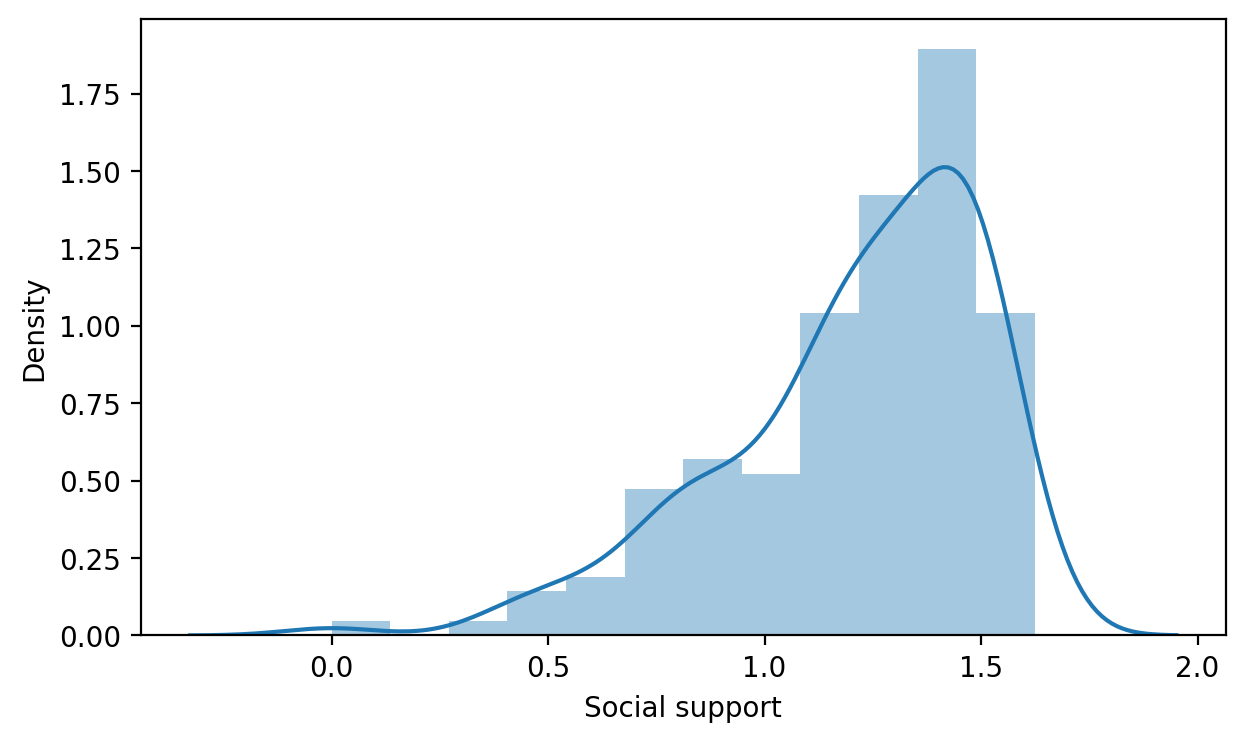

In [11]:
plt.figure(figsize=(7, 4), dpi=200)
sns.distplot(df['Social support'], kde = True);

In [12]:
#Посмотрим как коррелируют признаки между собой
df.corr(numeric_only=True)

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Overall rank,1.000000,-0.989096,-0.801947,-0.767465,-0.787411,-0.546606,-0.047993,-0.351959
Score,-0.989096,1.000000,0.793883,0.777058,0.779883,0.566742,0.075824,0.385613
GDP per capita,-0.801947,0.793883,1.000000,0.754906,0.835462,0.379079,-0.079662,0.298920
Social support,-0.767465,0.777058,0.754906,1.000000,0.719009,0.447333,-0.048126,0.181899
Healthy life expectancy,-0.787411,0.779883,0.835462,0.719009,1.000000,0.390395,-0.029511,0.295283
Freedom to make life choices,-0.546606,0.566742,0.379079,0.447333,0.390395,1.000000,0.269742,0.438843
Generosity,-0.047993,0.075824,-0.079662,-0.048126,-0.029511,0.269742,1.000000,0.326538
Perceptions of corruption,-0.351959,0.385613,0.298920,0.181899,0.295283,0.438843,0.326538,1.000000


In [13]:
#Проведём анализ корреляции между ВВП на душу населения и оценкой счастья. Используем коэффициент Пирсона.
correlation_coefficient, p_value = stats.pearsonr(df['GDP per capita'], df['Score'])

print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"P-значение: {p_value}")

Коэффициент корреляции Пирсона: 0.7938828678781275
P-значение: 4.315480913319406e-35


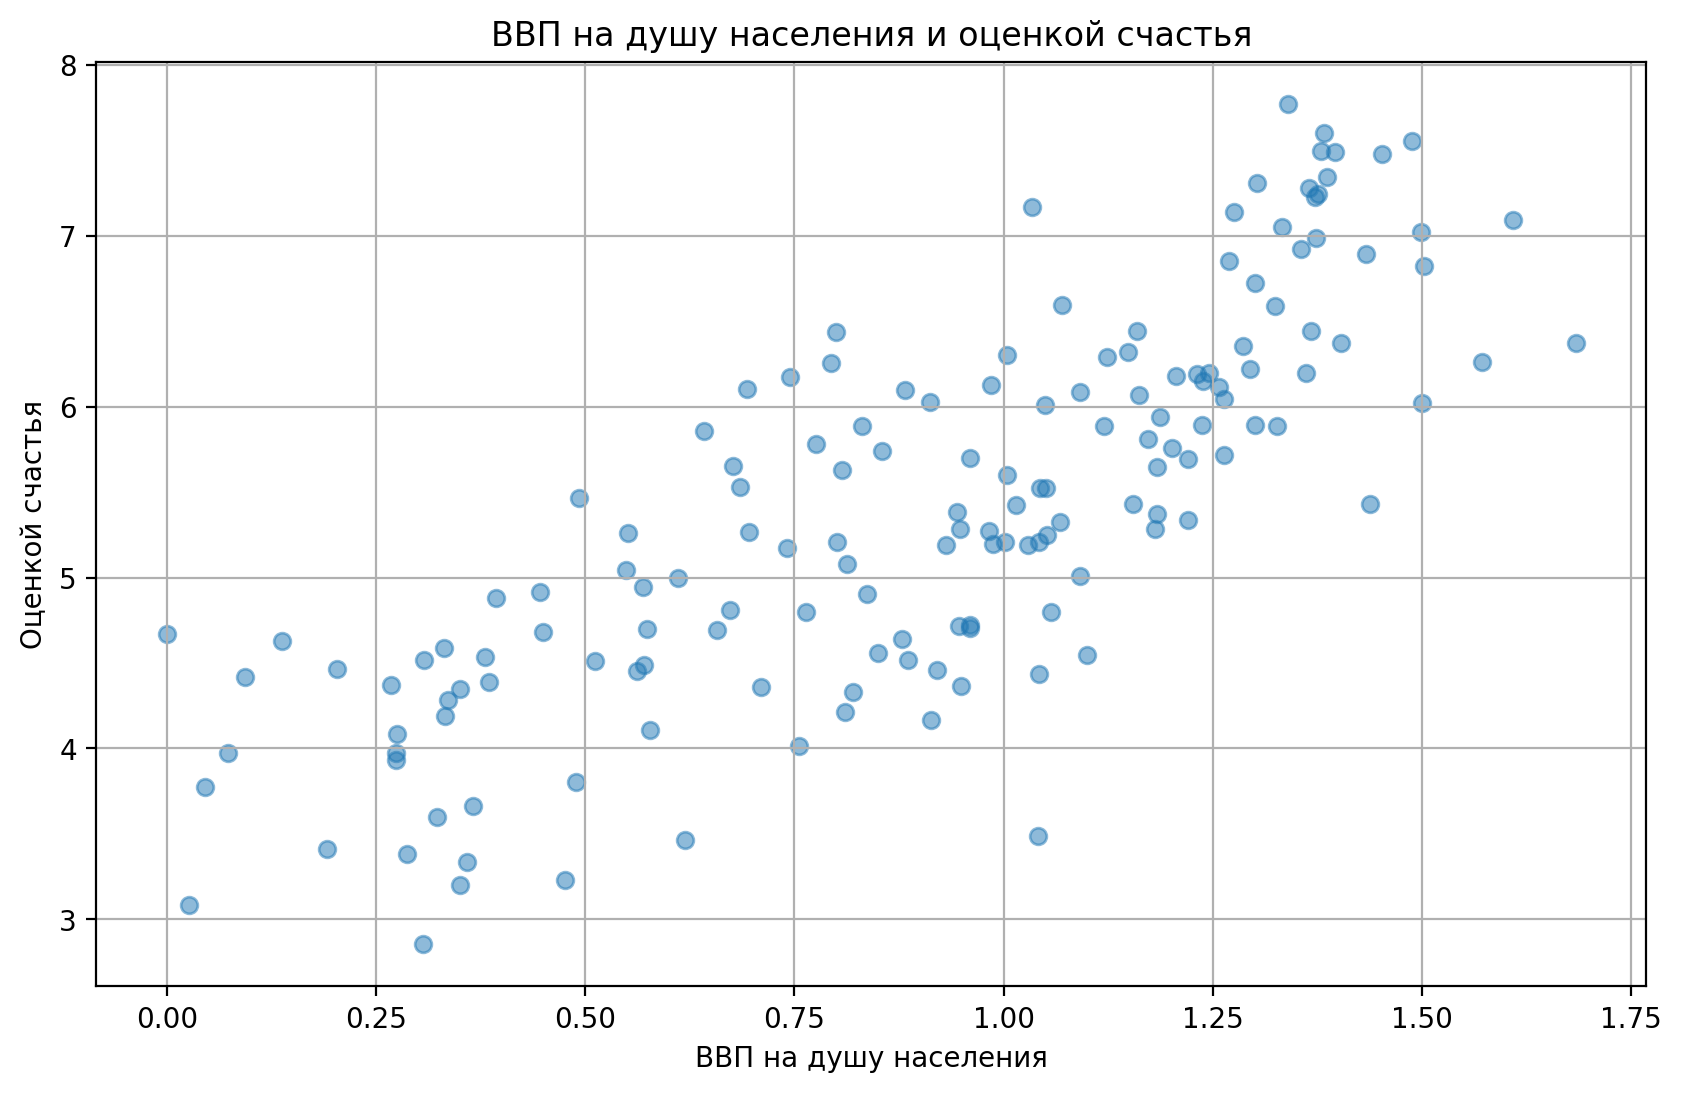

In [14]:
plt.figure(figsize=(10, 6), dpi=200)
plt.scatter(df['GDP per capita'], df['Score'], alpha=0.5)
plt.title('ВВП на душу населения и оценкой счастья')
plt.xlabel('ВВП на душу населения')
plt.ylabel('Оценкой счастья')
plt.grid(True)
plt.show();

Между показателями хорошая корреляция, P-значение достаточно низкое(поскольку это значение меньше стандартного порога в 0.05 для статистической значимости), что подтверждает о статистической значимости между признаками.
Исследуем влияния социальной поддержки на оценку счастья. Используем коэффициент Спирмена.

In [15]:
coef, p = stats.spearmanr(df['Social support'], df['Score'])
print(f"Коэффициент корреляции Спирмена между уровнем влияния социальной поддержки на оценку счастья: {coef}, P-value: {p}")

Коэффициент корреляции Спирмена между уровнем влияния социальной поддержки на оценку счастья: 0.8161807357057258, P-value: 1.613098226311642e-38


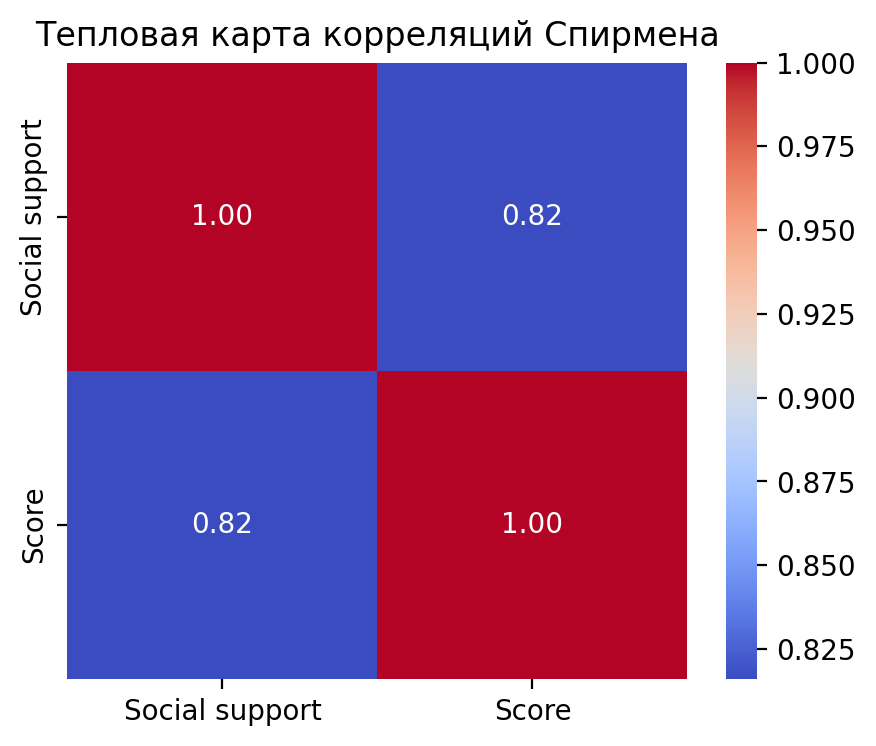

In [16]:
quantitative_vars = df[['Social support', 'Score']]
correlation_matrix = quantitative_vars.corr(method='spearman')  # Вычисляем матрицу корреляций Спирмена

# Тепловая карта корреляций
plt.figure(figsize=(5, 4), dpi=200)
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Тепловая карта корреляций Спирмена')
plt.show();

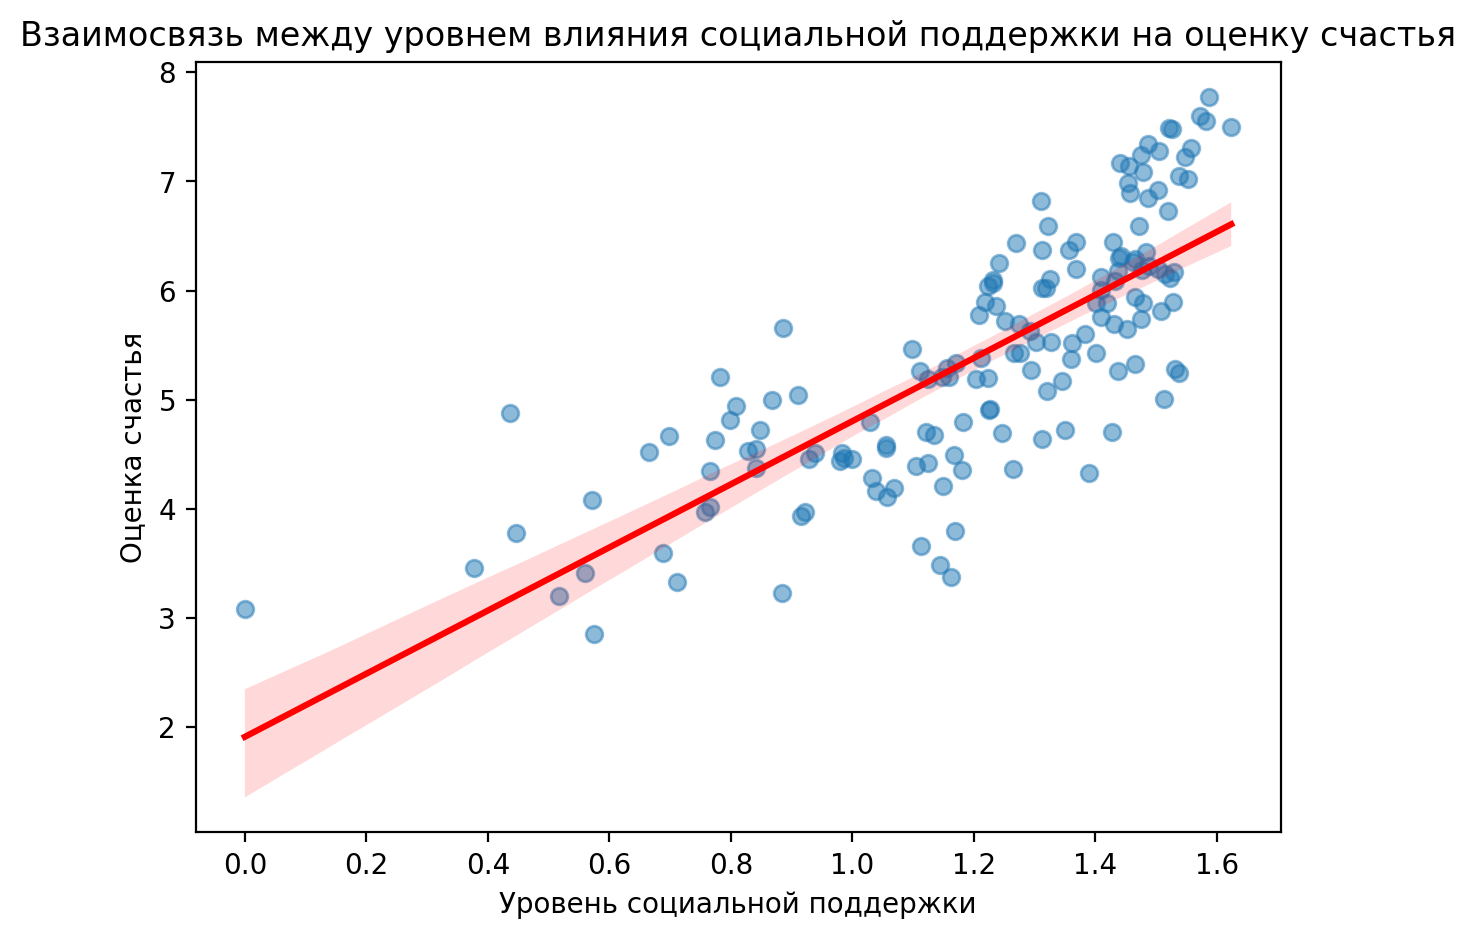

In [17]:
# График рассеивания с линией тренда для Social support и Score
plt.figure(figsize=(7, 5), dpi=200)
sns.regplot(x='Social support', y='Score', data=df, scatter_kws={'alpha': 0.5}, \
            line_kws={'color': 'red'})
plt.title('Взаимосвязь между уровнем влияния социальной поддержки на оценку счастья')
plt.xlabel('Уровень социальной поддержки')
plt.ylabel('Оценка счастья')
plt.show();

Как видно выше, между показателями достаточно хорошая корреляция, P-значение достаточно низкое(поскольку это значение меньше стандартного порога в 0.05 для статистической значимости), что подтверждает о статистической значимости между признаками.
Исследуем взаимосвязь между продолжительностью здоровой жизни и оценками счастья. Используем коэффициент корреляции Кэнделла для изучения этой связи.

Коэффициент корреляции Кэнделла: 0.6026128531700047, P-value: 8.000780684230196e-29


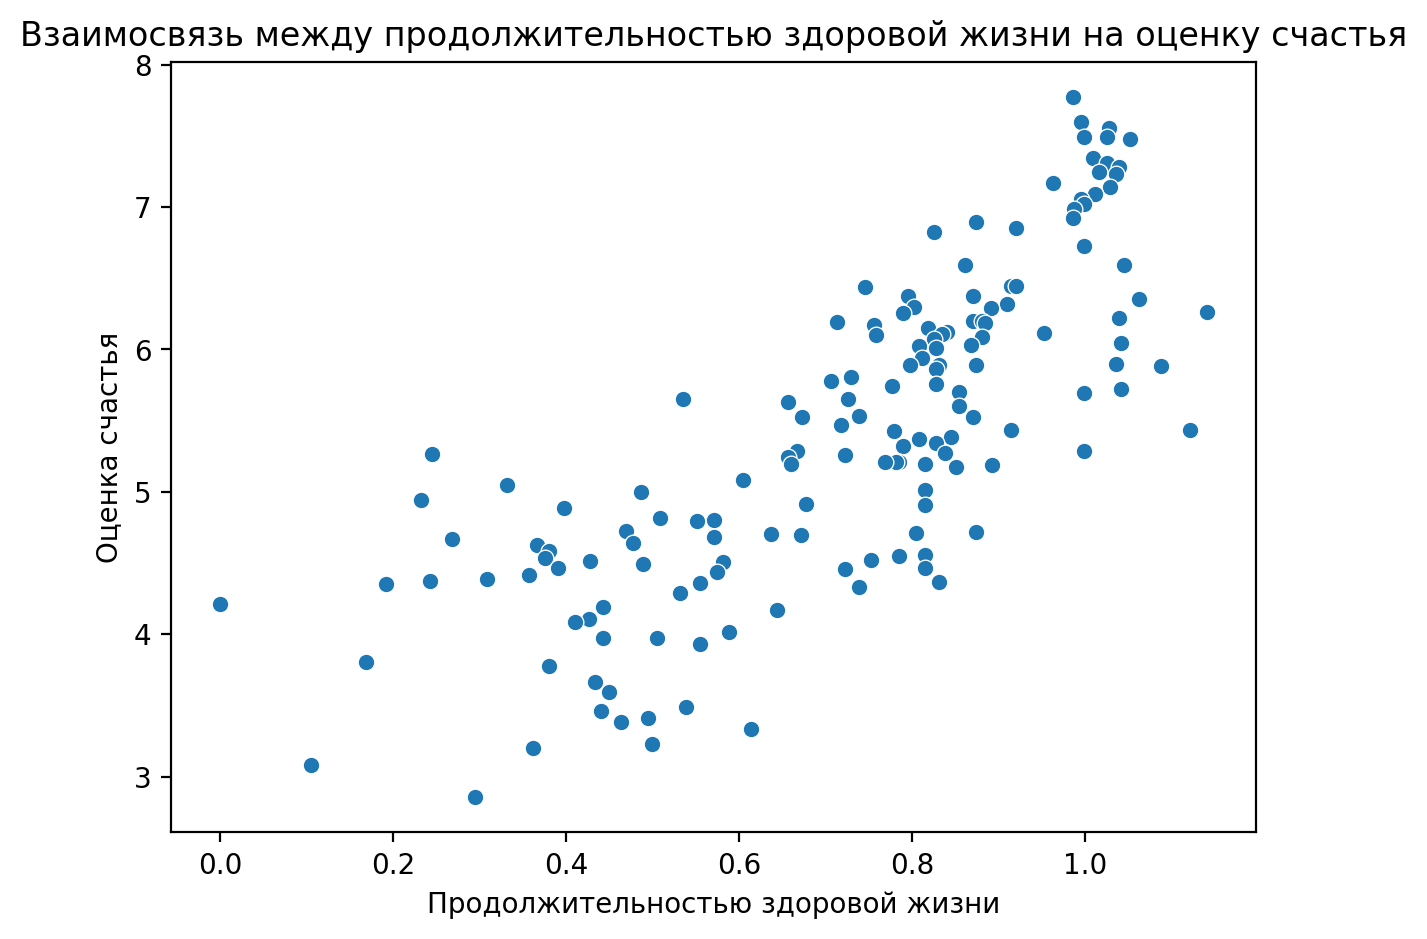

In [18]:
# Расчет коэффициента Кэнделла
tau, p_value = stats.kendalltau(df["Healthy life expectancy"], df["Score"])
print(f"Коэффициент корреляции Кэнделла: {tau}, P-value: {p_value}")

# Визуализация
plt.figure(figsize=(7, 5), dpi=200)
sns.scatterplot(x="Healthy life expectancy", y="Score", data=df)
plt.title('Взаимосвязь между продолжительностью здоровой жизни на оценку счастья')
plt.xlabel('Продолжительностью здоровой жизни')
plt.ylabel('Оценка счастья')
plt.show();

Как видно выше, между признаками неплохая корреляция, P-значение достаточно низкое(поскольку это значение меньше стандартного порога в 0.05 для статистической значимости), что подтверждает о статистической значимости между признаками.
Исследуем связь между свободой делать жизненный выбор и уровнем счастья. Проанализируем, используя коэффициент корреляции Пирсона.

In [19]:
correlation_coefficient, p_value = stats.pearsonr(df['Freedom to make life choices'], df['Score'])

print(f"Коэффициент корреляции Пирсона: {correlation_coefficient}")
print(f"P-значение: {p_value}")

Коэффициент корреляции Пирсона: 0.5667418257199902
P-значение: 1.23792436279821e-14


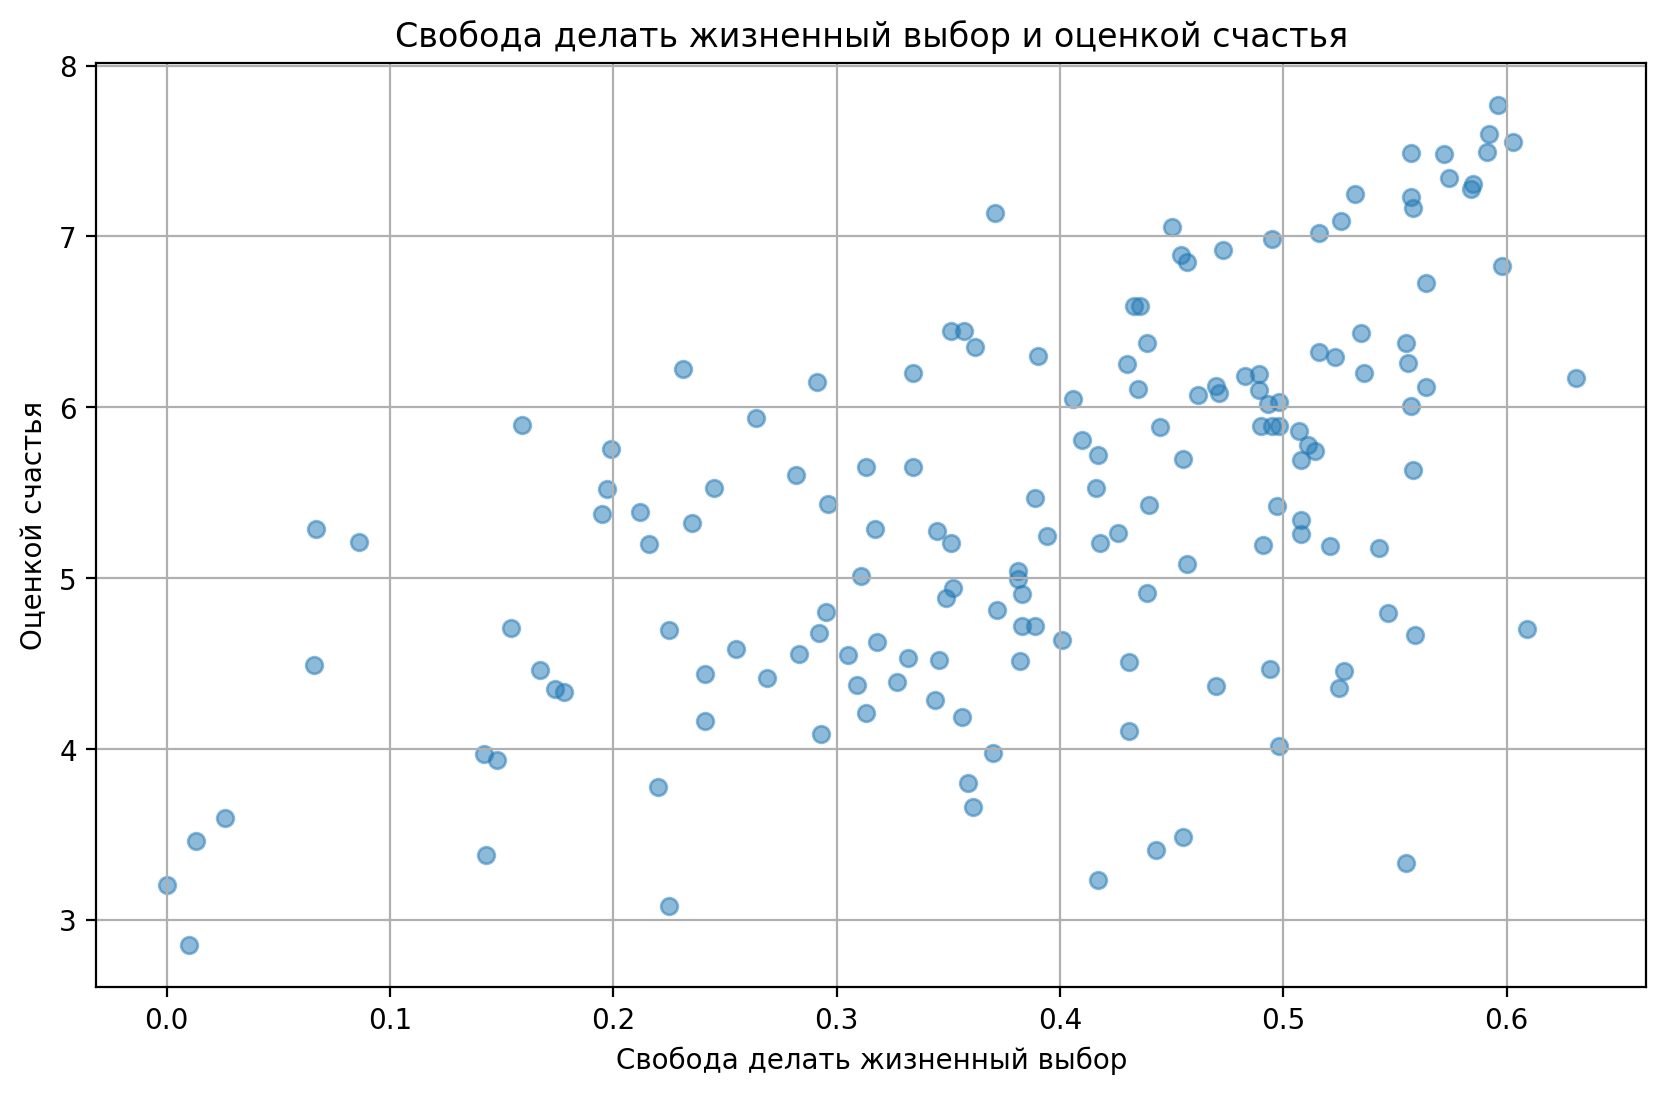

In [20]:
plt.figure(figsize=(10, 6), dpi=200)
plt.scatter(df['Freedom to make life choices'], df['Score'], alpha=0.5)
plt.title('Свобода делать жизненный выбор и оценкой счастья')
plt.xlabel('Свобода делать жизненный выбор')
plt.ylabel('Оценкой счастья')
plt.grid(True)
plt.show();

Как видно выше, между признаками неплохая корреляция, P-значение достаточно низкое(поскольку это значение меньше стандартного порога в 0.05 для статистической значимости), что подтверждает о статистической значимости между признаками.
Если сделать вывод, то можно сказать относчительно многих других показателей, уровень социальной поддержки оказывает наибольшее влияние на уровень счастья в различных странах. И это справедливо, так как данный показатель включает комплекс различных мер, которые направлены на обеспечение достойного уровня жизни граждан страны.